In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import prettytable as pt
from matplotlib import pyplot as plt
import os 
import warnings
warnings.filterwarnings("ignore")

###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################

directory = os.path.normpath(os.getcwd() + os.sep + os.pardir+ os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

In [2]:
data = {
    "valuationDate": "2019-10-14",
    "endOfMonth": True,
    "discountCurve": {
        "settlementDays": 2,
        "intpMethod": "LOGLINEAR",
        "currency": "USD",
        "calendar": "UnitedStates",
        "dayCounter": "Actual360",
        "period": "1D",
        "instruments": {
            "DEPO": {
                "businessDayConvention": "Following",
                "dayCounter": "Actual360"
            },
            "OIS": {
                "businessDayConvention": "Following",
                "dayCounter": "Actual360",
                "frequency": "Annual"
            }
        }
    },
    "baseCurve": {
        "settlementDays": 2,
        "intpMethod": "LOGLINEAR",
        "currency": "USD",
        "calendar": "UnitedStates",
        "dayCounter": "Thirty360",
        "period": "3M",
        "instruments": {
            "DEPO": {
                "businessDayConvention": "Following",
                "dayCounter": "Actual360"
            },
            "FUTURES": {
                "businessDayConvention": "Following",
                "dayCounter": "Actual360",
                "market": "IMM"
            },
            "IRS": {
                "businessDayConvention": "Following",
                "dayCounter": "Thirty360",
                "frequency": "Semiannual"
            }
        }
    },
    "yieldCurve": {
        "settlementDays": 2,
        "intpMethod": "LOGLINEAR",
        "currency": "USD",
        "calendar": "UnitedStates",
        "dayCounter": "Actual360",
        "period": "1M",
        "instruments": {
            "DEPO": {
                "businessDayConvention": "Following",
                "dayCounter": "Actual360"
            },
            "BSSWP": {
                "businessDayConvention": "Following",
                "dayCounter": "Actual360",
                "referenceFrequency": "Quarterly",
                "quoteFrequency": "Monthly",
                #"tenorList": ['1M','1Y','18M','2Y','3Y','4Y','5Y','6Y',
                #              '7Y','10Y','12Y','15Y','20Y','30Y']
            }
        }
    },
    "yieldData": yielddata.to_dict("r")
}


In [3]:
try:
    result = api.createTask(CalculationType.YIELD_CURVE, data,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()

In [4]:
zerorates=result.get("zeroRates"),
discountrates=result.get("discountRates")
dates=[]
forwarddates= {}
rhoovayieldcurvedicts = {}
rhoovayieldcurvediscounts = {}
for rhvzr in zerorates[0]:
    rhoovayieldcurvedicts[datetime.strptime(rhvzr.get('date'),'%Y-%m-%d').date()] = rhvzr.get('rate')*100
    dates.append(rhvzr.get('date'))

for rhv in discountrates:
    rhoovayieldcurvediscounts[datetime.strptime(rhv.get('date'), '%Y-%m-%d').date()] = rhv.get('rate')
    

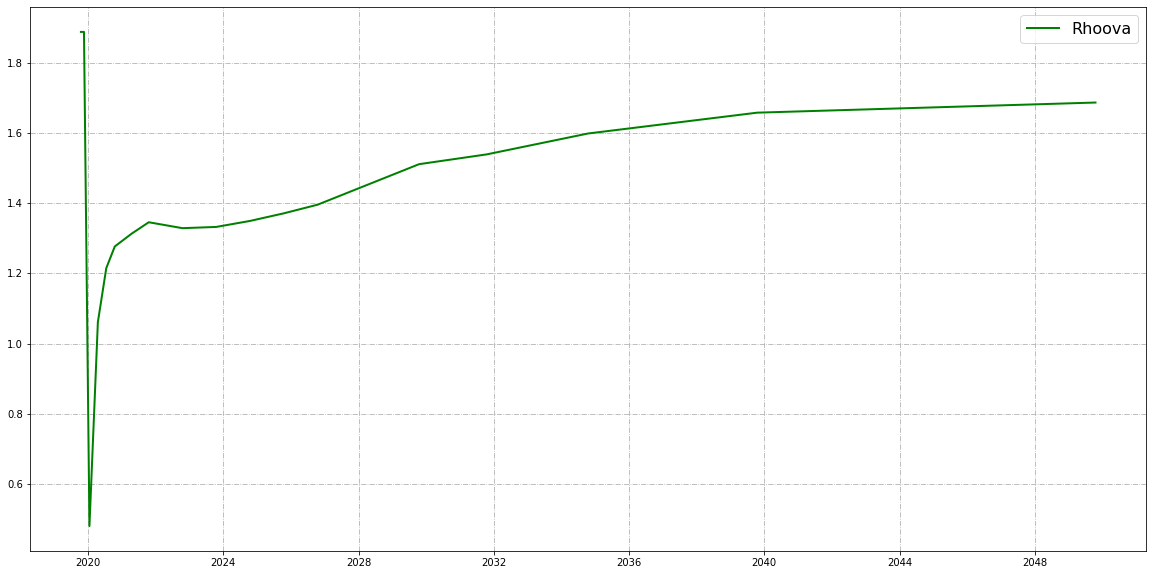

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvedicts.keys())
y = list(rhoovayieldcurvedicts.values())


ax.plot(x,y, 'g', label='Rhoova', linewidth=2)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

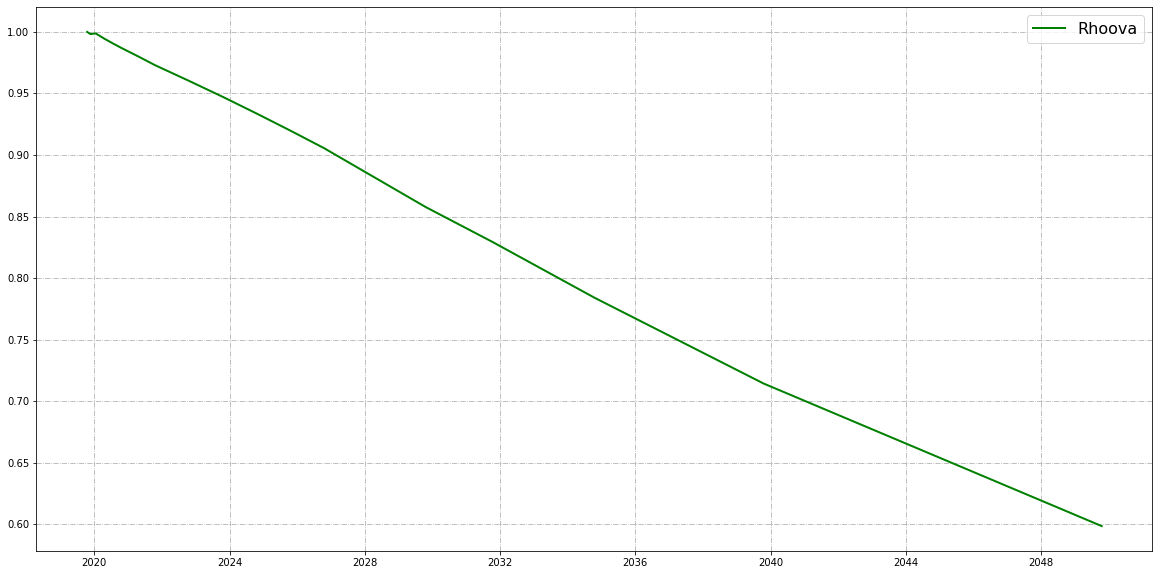

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvediscounts.keys())
y = list(rhoovayieldcurvediscounts.values())

ax.plot(x,y, 'g', label='Rhoova', linewidth=2)

leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

In [7]:
pTable = pt.PrettyTable(['Maturity','Zero Rates','Discount Rates'])
i=0
for key, val in rhoovayieldcurvedicts.items():
    pTable.add_row([key,val,rhoovayieldcurvediscounts.get(key)])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+------------+----------------+
|  Maturity  | Zero Rates | Discount Rates |
+------------+------------+----------------+
| 2019-10-16 |  1.887516  |       1        |
| 2019-11-18 |  1.887516  |    0.998271    |
| 2020-01-16 |  0.480630  |    0.998772    |
| 2020-04-16 |  1.061339  |    0.994619    |
| 2020-07-16 |  1.215119  |    0.990794    |
| 2020-10-16 |  1.276752  |    0.987104    |
| 2021-04-16 |  1.313162  |    0.980209    |
| 2021-10-18 |  1.345634  |    0.972973    |
| 2022-10-17 |  1.328779  |    0.960318    |
| 2023-10-16 |  1.332290  |    0.947367    |
| 2024-10-16 |  1.349400  |    0.933810    |
| 2025-10-16 |  1.371031  |    0.919909    |
| 2026-10-16 |  1.395657  |    0.905625    |
| 2029-10-16 |  1.510974  |    0.857854    |
| 2031-10-16 |  1.538818  |    0.829153    |
| 2034-10-16 |  1.598326  |    0.784070    |
| 2039-10-17 |  1.657619  |    0.714334    |
| 2049-10-18 |  1.686436  |    0.598442    |
+------------+------------+----------------+


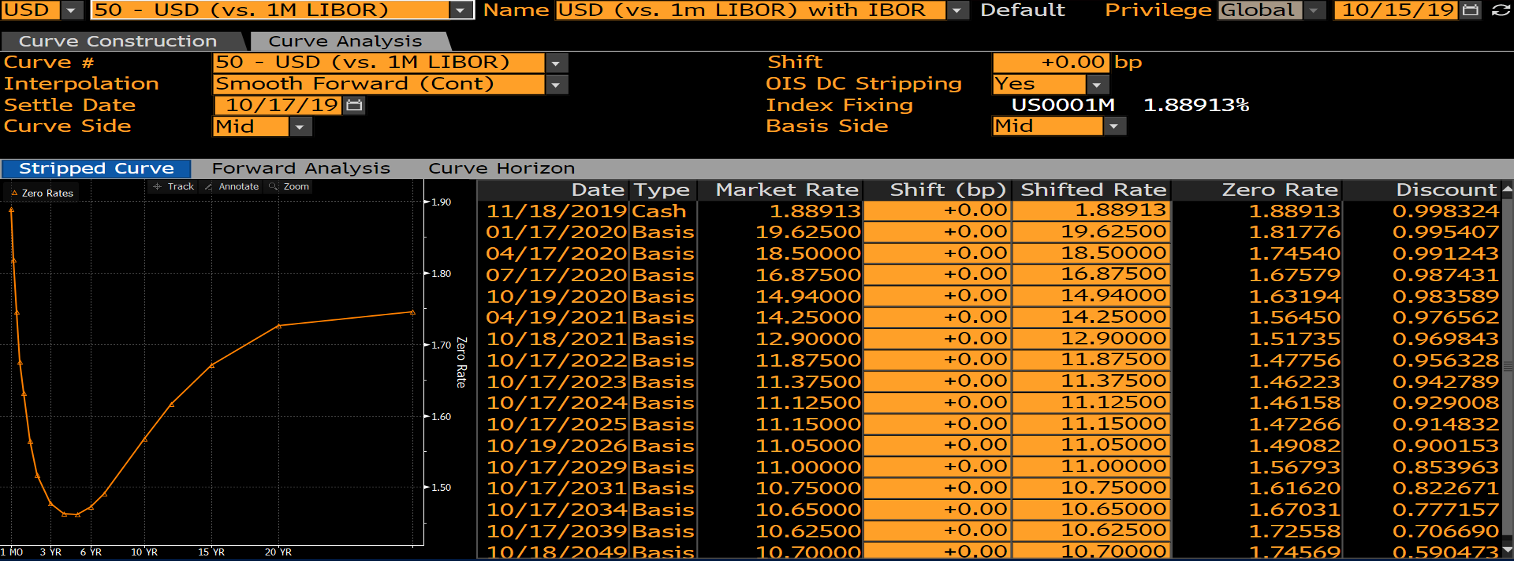

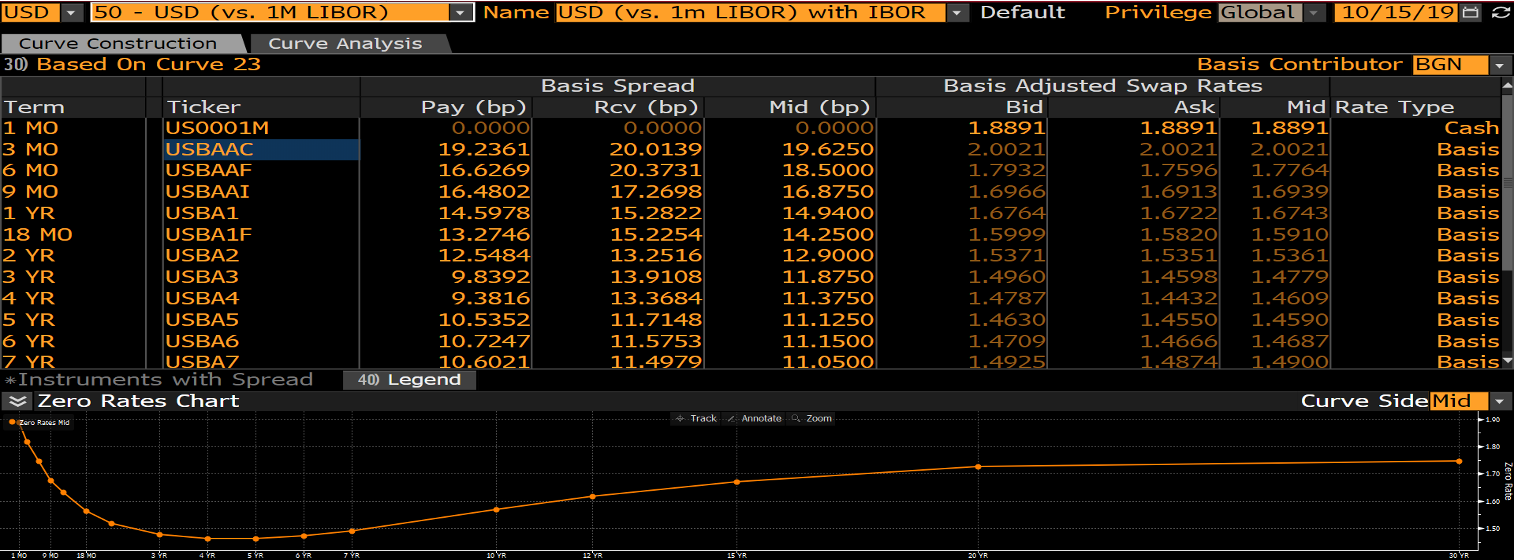

In [8]:
basisdata=yielddata[yielddata["valuationDate"]=="2019-10-14"]
basisdata[basisdata["period"]=="1M"]

,tenor,maturityDate,value,valuationDate,currency,instrument,settlementDate,period,startDate,convexityAdjustment
3857,1M,2019-11-18,0.018891,2019-10-14,USD,DEPO,2D,1M,,
21253,3M,,19.625000,2019-10-14,USD,BSSWP,2D,1M,,
21254,6M,,18.500000,2019-10-14,USD,BSSWP,2D,1M,,
21255,9M,,16.875000,2019-10-14,USD,BSSWP,2D,1M,,
21256,1Y,,14.940000,2019-10-14,USD,BSSWP,2D,1M,,
21257,18M,,14.250000,2019-10-14,USD,BSSWP,2D,1M,,
21258,2Y,,12.900000,2019-10-14,USD,BSSWP,2D,1M,,
21259,3Y,,11.875000,2019-10-14,USD,BSSWP,2D,1M,,
21260,4Y,,11.375000,2019-10-14,USD,BSSWP,2D,1M,,
21261,5Y,,11.125000,2019-10-14,USD,BSSWP,2D,1M,,
